<a href="https://colab.research.google.com/github/DirkFritz/finance_data_analysis/blob/main/index_analysis/ndx100_marketcap_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
nasdaq_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/nasdaq_screener_1620482682649.csv')
nasdaq_df = nasdaq_df.set_index('Symbol')
nasdaq_df

In [ ]:
nasdaq100_df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
nasdaq100_df

In [ ]:
df=nasdaq_df.loc[nasdaq100_df['Ticker'],:]
df[df.columns[1]] = df[df.columns[1]].replace('[\$,]', '', regex=True).astype(float)
df['No Shares'] = df['Market Cap']/df['Last Sale']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df)

In [13]:
ndx_sectors = df['Sector'].unique()
print(ndx_sectors)

['Technology' 'Health Care' 'Consumer Services' 'Public Utilities'
 'Capital Goods' 'Miscellaneous' 'Transportation' nan
 'Consumer Non-Durables']


In [14]:
df.to_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/nasdaq100.csv')

In [ ]:
ndx_prices_df = pd.read_csv('/content/drive/MyDrive/Entwicklung/IndexAnalyzer/ndxdata.csv')
ndx_prices_df

In [ ]:
nasdaq_df = nasdaq_df.reset_index()

nasdaq_df





In [ ]:
fangplus_symbols =['AMZN','FB','AAPL','GOOG','GOOGL','MSFT']

ndx100 = nasdaq_df.loc[nasdaq_df['Symbol'].isin(nasdaq100_df['Ticker'].tolist()) ]
ndx100_no_faang = ndx100.loc[~ndx100['Symbol'].isin(fangplus_symbols) ]
ndx100_no_faang_tech = ndx100_no_faang.loc[ndx100_no_faang['Sector'] =='Technology']
ndx100_no_faang_no_tech = ndx100_no_faang.loc[ndx100_no_faang['Sector'] !='Technology']

ndx100_no_faang_no_tech

In [23]:
def creade_market_cap_record(market_cap_df,group_name, symbols_group,stock_prices_df ):
  compare_date1 = 20210216
  compare_date2 = 20210427
  print(symbols_group)

  for symbol in symbols_group:
    price_data1 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date1) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    price_data2 = stock_prices_df.loc[(stock_prices_df['DateTime'] == compare_date2) & (stock_prices_df['Symbol'] == symbol)]['Price'].iloc[0]
    number_shares =df.loc[symbol]['No Shares']
    #print(price_data1,"", price_data2, '', number_shares)
 
    data_record =[ [group_name,symbol,compare_date1,number_shares*price_data1,compare_date2,number_shares*price_data2]]
    #print(data_record)
    market_cap_df = market_cap_df.append(pd.DataFrame(data_record, columns=market_cap_groups_cols))
    
  return market_cap_df
  


In [ ]:
market_cap_groups_cols = ['Group','Symbol', 'Date1', 'Market Cap 1', 'Date2','Market Cap 2']
market_cap_groups_df = pd.DataFrame(columns=market_cap_groups_cols)

market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"FAANG+", fangplus_symbols,ndx_prices_df)
market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"TECH", ndx100_no_faang_tech['Symbol'].tolist(),ndx_prices_df)
market_cap_groups_df =creade_market_cap_record( market_cap_groups_df,"OTHERS", ndx100_no_faang_no_tech['Symbol'].tolist(),ndx_prices_df)


market_cap_groups_df.loc[market_cap_groups_df['Symbol'].isin(['GOOG', 'GOOGL']),['Market Cap 1','Market Cap 2']] *=0.5
market_cap_groups_df['Percent1'] = (market_cap_groups_df['Market Cap 1'] / market_cap_groups_df['Market Cap 1'].sum()) * 100
market_cap_groups_df['Percent2'] = (market_cap_groups_df['Market Cap 2'] / market_cap_groups_df['Market Cap 2'].sum()) * 100
market_cap_grouped_df = market_cap_groups_df.groupby('Group').sum()

market_cap_grouped_df['Delta'] = market_cap_grouped_df['Percent2']-market_cap_grouped_df['Percent1']
market_cap_groups_df[market_cap_groups_df['Group'] == 'TECH']

,Market Cap 1,Market Cap 2,Percent1,Percent2,Delta
Group,,,,,
FAANG+,7.988089e+12,8.481669e+12,47.710504,49.778876,2.068372
OTHERS,5.314428e+12,5.151642e+12,31.741516,30.234963,-1.506553
TECH,3.440313e+12,3.405380e+12,20.547980,19.986161,-0.561819


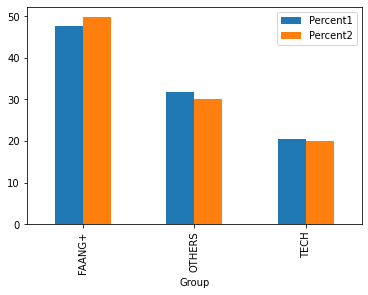

In [34]:
market_cap_grouped_df[['Percent1', 'Percent2']].plot(kind="bar")
market_cap_grouped_df

